# 데이터 불러오기 및 데이터 스케일링

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
kream = pd.read_csv('df_filtered.csv', encoding = 'cp949')
kream

,상품명,거래량,최근거래가,발매일,발매일로부터현재까지일,발매가,색상개수,최고거래가,최고거래성사일,최저거래가,...,브랜드_Adidas,브랜드_Asics,브랜드_Converse,브랜드_Jordan,브랜드_Mihara Yasuhiro,브랜드_New Balance,브랜드_Nike,브랜드_Puma,브랜드_Salomon,브랜드_Vans
0,나이키 V2K 런 라이트 오어우드 브라운 카키,4.748321,3.427711,2024-01-04,12.402237,3.959586,4,2.869657,2024-05-10,3.734096,...,0,0,0,0,0,0,1,0,0,0
1,나이키 에어 줌 알파플라이 넥스트% 3 볼트,4.753022,3.471594,2024-02-15,10.657562,4.006456,4,2.885397,2024-02-15,3.800698,...,0,0,0,0,0,0,1,0,0,0
2,(W) 나이키 에어포스 1 '07 WB 플랙스 위트,4.535706,3.445503,2023-12-18,13.006454,3.969553,3,2.876575,2024-03-18,3.746308,...,0,0,0,0,0,0,1,0,0,0
3,(W) 나이키 코르테즈 SE 밸런타인데이 세일 어도비,4.742146,3.432313,2024-02-14,10.704532,3.955055,4,2.869657,2024-02-02,3.727202,...,0,0,0,0,0,0,1,0,0,0
4,나이키 V2K 런 화이트 퍼,4.735441,3.433910,2023-09-08,15.900007,3.959586,4,2.870449,2024-02-22,3.712485,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,나이키 에어포스 1 '07 LV8 화이트 블랙 울프 그레이,4.290478,3.459225,2021-11-27,25.740766,3.942443,4,2.879860,2023-06-15,3.750450,...,0,0,0,0,0,0,1,0,0,0
1717,나이키 에어포스 1 '07 LV8 넥스트 네이쳐 라탄 세일 브라운 켈프,3.338150,3.445911,2021-11-05,25.969419,3.968846,2,2.870449,2021-12-20,3.720837,...,0,0,0,0,0,0,1,0,0,0
1718,나이키 블레이저 미드 '77 점보 다크 러셋,2.754610,3.428090,2021-11-04,25.979726,3.955055,2,2.870449,2021-12-02,3.716376,...,0,0,0,0,0,0,1,0,0,0
1719,(W) 나이키 블레이저 미드 '77 LX 화이트 펜던트,2.689813,3.436583,2021-11-04,25.979726,3.959586,2,2.870525,2021-11-01,3.734731,...,0,0,0,0,0,0,1,0,0,0


In [2]:
kream_1 = kream[['수익률', '거래량', '가격변동성']]	#필요한 데이터 분리
print(kream_1)

            수익률       거래량       가격변동성
0     16.369253  4.748321  549.924666
1     34.619743  4.753022  421.307319
2     31.049965  4.535706  748.701225
3     19.775355  4.742146  644.740906
4     18.723327  4.735441  853.630261
...         ...       ...         ...
1716  71.567841  4.290478  870.972815
1717  11.500285  3.338150  761.553027
1718  22.134356  2.754610  812.235411
1719  18.948917  2.689813  586.101180
1720  18.996439  3.723108  855.295509

[1721 rows x 3 columns]


In [3]:
kream_1 = kream_1.rename(columns = {'수익률': 'rate', '거래량': 'volume', '가격변동성': 'variability'})    #열이름 변경
print(kream_1)

           rate    volume  variability
0     16.369253  4.748321   549.924666
1     34.619743  4.753022   421.307319
2     31.049965  4.535706   748.701225
3     19.775355  4.742146   644.740906
4     18.723327  4.735441   853.630261
...         ...       ...          ...
1716  71.567841  4.290478   870.972815
1717  11.500285  3.338150   761.553027
1718  22.134356  2.754610   812.235411
1719  18.948917  2.689813   586.101180
1720  18.996439  3.723108   855.295509

[1721 rows x 3 columns]


In [4]:
print("max\n", kream_1.max())
print("min\n", kream_1.min())

max
 rate            102.616755
volume            5.263811
variability    1234.283256
dtype: float64
min
 rate           -45.728531
volume           2.052011
variability    232.880173
dtype: float64


In [5]:
from sklearn.preprocessing import StandardScaler # 스케일링

scaler = StandardScaler()
kream_1_scaled = scaler.fit_transform(kream_1)
print(kream_1_scaled)

[[-0.33447903  1.44678202 -0.8724063 ]
 [ 0.47077539  1.45274574 -1.46026883]
 [ 0.31326842  1.17704855  0.03612815]
 ...
 [-0.08010916 -1.08253079  0.32651952]
 [-0.22065819 -1.16473615 -0.70705678]
 [-0.21856143  0.14614975  0.52333137]]


## 조건이 '수익률', '거래량', '변동성' 일 때
### DBSCAN

In [6]:
from sklearn.cluster import DBSCAN

### 그래프 그리기

In [7]:
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] =False

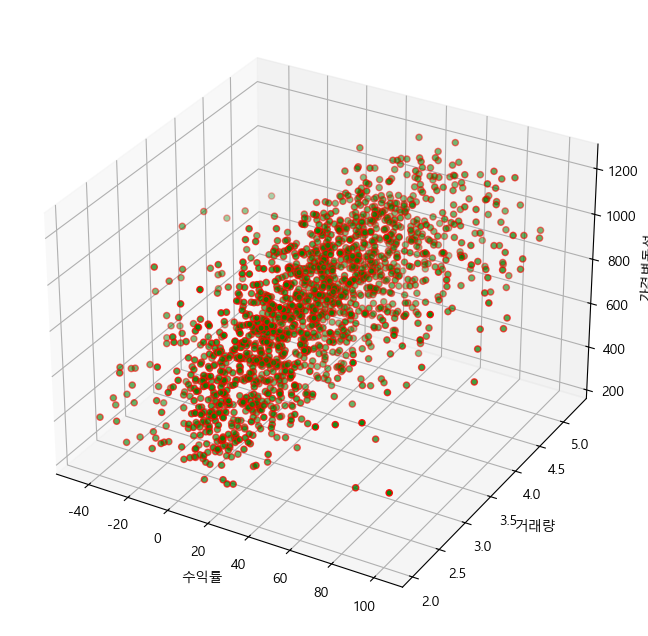

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

x = kream_1['rate']
y = kream_1['volume']
z = kream_1['variability']

ax.scatter(x, y, z, c = 'g', edgecolors = 'red')
ax.set_xlabel('수익률')
ax.set_ylabel('거래량')
ax.set_zlabel('가격변동성')

plt.show()

### DBSCAN clustering

In [9]:
eps_settings = [0.1, 0.25, 0.5, 1, 2]
ms_settings = [2, 3, 5, 7]

for elps in eps_settings:
    for ms in ms_settings:
        db = DBSCAN(eps = elps, min_samples = ms)
        db.fit(kream_1_scaled)       
                
        kream_1_db = db.labels_
        
        print("eps = ", elps, "min_samples = ", ms)
        print(pd.DataFrame(kream_1_db).value_counts(sort = False))

eps =  0.1 min_samples =  2
-1      1332
 0         3
 1         2
 2         2
 3         2
        ... 
 156       2
 157       2
 158       2
 159       2
 160       2
Name: count, Length: 162, dtype: int64
eps =  0.1 min_samples =  3
-1     1576
 0        3
 1        4
 2        4
 3        4
 4        4
 5        8
 6        4
 7        3
 8        4
 9        4
 10       3
 11       3
 12       3
 13       5
 14       3
 15       4
 16       3
 17       6
 18       5
 19       4
 20       3
 21       3
 22       5
 23       4
 24       3
 25       3
 26       3
 27       4
 28       3
 29       3
 30       3
 31       4
 32       3
 33       3
 34       3
 35       4
 36       3
 37       3
 38       4
Name: count, dtype: int64
eps =  0.1 min_samples =  5
-1    1721
Name: count, dtype: int64
eps =  0.1 min_samples =  7
-1    1721
Name: count, dtype: int64
eps =  0.25 min_samples =  2
-1      265
 0     1180
 1        2
 2        2
 3        2
       ... 
 84       2
 85       2
 

#### eps =  0.25, min_samples =  5 일 때, 적당하다고 판단 

In [15]:
dbscan = DBSCAN(eps = 0.25, min_samples = 7)
dbscan.fit(kream_1_scaled)

DBSCAN(eps=0.25, min_samples=7)

In [16]:
kream_1_dbscan = dbscan.labels_
print(pd.DataFrame(kream_1_dbscan))

      0
0    -1
1    -1
2     0
3    -1
4    -1
...  ..
1716 -1
1717  0
1718  0
1719  0
1720  0

[1721 rows x 1 columns]


In [17]:
kream_1_dbscan = pd.DataFrame(kream_1_dbscan)
kream_1_dbscan.value_counts()  # 클러스터별 개수 확인

-1     829
 0     781
 4      20
 3      14
 5      13
 9      10
 12     10
 8       9
 1       7
 7       7
 2       6
 11      6
 10      5
 6       4
Name: count, dtype: int64

In [20]:
kream_1.insert(3, 'dbscan', kream_1_dbscan)
kream_1_clustered = kream_1  # 클러스터 라벨링

ValueError: cannot insert dbscan, already exists

In [21]:
kream_1_clustered

,rate,volume,variability,dbscan
0,16.369253,4.748321,549.924666,-1
1,34.619743,4.753022,421.307319,-1
2,31.049965,4.535706,748.701225,0
3,19.775355,4.742146,644.740906,-1
4,18.723327,4.735441,853.630261,2
...,...,...,...,...
1716,71.567841,4.290478,870.972815,-1
1717,11.500285,3.338150,761.553027,0
1718,22.134356,2.754610,812.235411,0
1719,18.948917,2.689813,586.101180,0


### 그래프 그리기

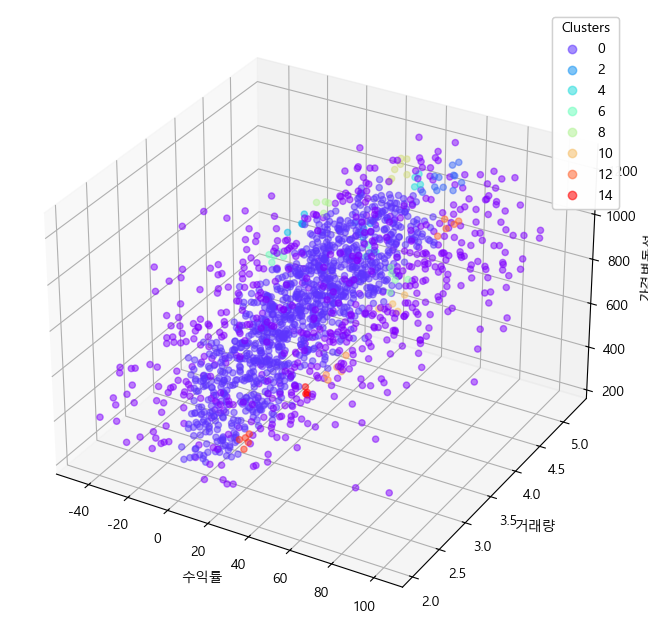

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

x = kream_1_clustered['rate']
y = kream_1_clustered['volume']
z = kream_1_clustered['variability']

scatter = ax.scatter(x, y, z, c = kream_1_clustered.dbscan, cmap = "rainbow", alpha = 0.5)
ax.set_xlabel('수익률')
ax.set_ylabel('거래량')
ax.set_zlabel('가격변동성')

legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend)
plt.show()

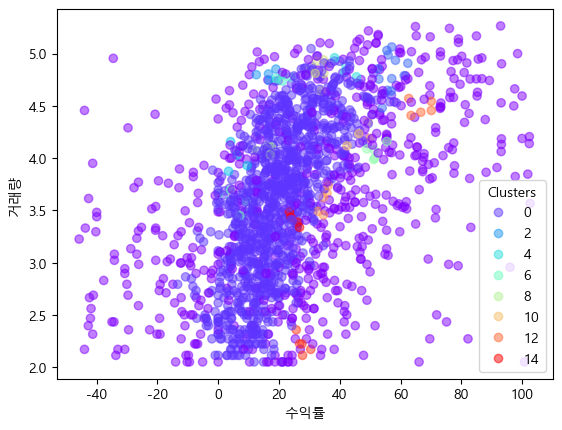

In [23]:
plt.scatter(kream_1_clustered['rate'], kream_1_clustered['volume'], c = kream_1_clustered.dbscan, cmap = "rainbow", alpha = 0.5)
plt.xlabel('수익률')
plt.ylabel('거래량')
plt.legend(*scatter.legend_elements(), title="Clusters")

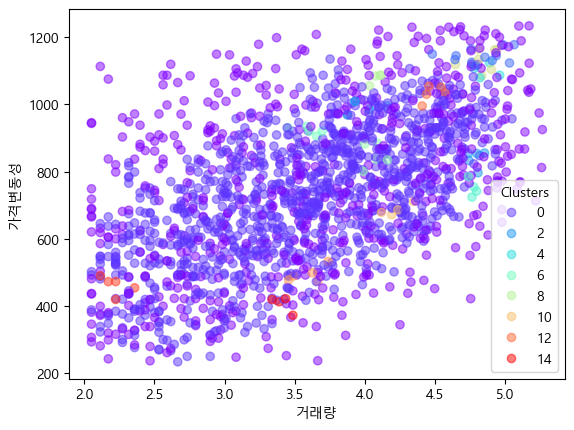

In [24]:
plt.scatter(kream_1_clustered['volume'], kream_1_clustered['variability'], c = kream_1_clustered.dbscan, cmap = "rainbow", alpha = 0.5)
plt.xlabel('거래량')
plt.ylabel('가격변동성')
plt.legend(*scatter.legend_elements(), title="Clusters")

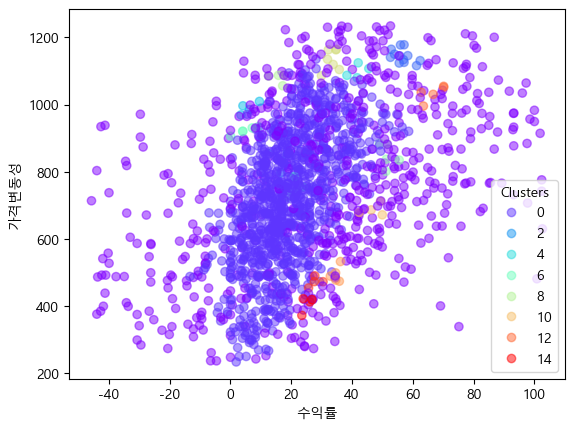

In [25]:
plt.scatter(kream_1_clustered['rate'], kream_1_clustered['variability'], c = kream_1_clustered.dbscan, cmap = "rainbow", alpha = 0.5)
plt.xlabel('수익률')
plt.ylabel('가격변동성')
plt.legend(*scatter.legend_elements(), title="Clusters")

### 결과와 관련된 통계량

In [26]:
print("평균값\n", kream_1_clustered[['rate', 'volume', 'variability', 'dbscan']].groupby('dbscan').mean())
print("\n표준편차\n", kream_1_clustered[['rate', 'volume', 'variability', 'dbscan']].groupby('dbscan').std())
print("\n중앙값\n", kream_1_clustered[['rate', 'volume', 'variability', 'dbscan']].groupby('dbscan').median())
print("\n최대값\n", kream_1_clustered[['rate', 'volume', 'variability', 'dbscan']].groupby('dbscan').max())
print("\n최소값\n", kream_1_clustered[['rate', 'volume', 'variability', 'dbscan']].groupby('dbscan').min())

평균값
              rate    volume  variability
dbscan                                  
-1      30.620527  3.618901   760.707078
 0      19.331586  3.560011   719.142956
 1      56.641813  4.820765  1144.333620
 2      16.715706  4.786160   838.377545
 3       5.820503  3.997945   989.910578
 4      41.875169  4.861030  1099.658340
 5      21.318105  4.767219   751.155312
 6       4.901298  3.598913   922.128267
 7      51.688836  4.062386   847.937032
 8      15.771919  4.081898  1078.679640
 9      33.298904  4.837159  1133.612409
 10     46.985910  4.221856   686.690040
 11     34.817384  3.594848   493.836909
 12     66.629354  4.482940  1033.565227
 13     27.653872  2.218907   461.185152
 14     25.075302  3.412067   405.936108

표준편차
              rate    volume  variability
dbscan                                  
-1      33.026925  0.880641   254.157871
 0      11.732033  0.715706   187.295779
 1       2.974529  0.175311    20.414617
 2       2.578887  0.048557    25.214415
 3  